In [1]:
# more data frame -> example ()
# value_counts
# sort_values
# rank
# sort_index
# set_index
# rename index -> rename
# reset_index
# unique & nunique
# isnull/notnull/hasnans
# dropna
# fillna
# drop_duplicates
# drop
# apply
# isin
# corr
# nlargest -> nsmallest
# insert
# copy


In [5]:
import numpy as np
import pandas as pd

In [8]:
# 1) value_counts ( series and DataFrame)

marks = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [80,70,14],
    [80,70,14]
], columns = ['iq','Marks','Package'])

marks

,iq,Marks,Package
0,100,80,10
1,90,70,7
2,80,70,14
3,80,70,14


In [ ]:
# value_counts -> count how many rows are repeated and give the number of times it is repeated
marks.value_counts()

iq   Marks  Package
80   70     14         2
90   70     7          1
100  80     10         1
Name: count, dtype: int64

In [13]:
# import ipl match data ste 
ipl = pd.read_csv('ipl-matches.csv')
ipl.head(2) 

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [19]:
# Find which player has won most player of the match -> in finals and qualifiers
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()


Player_of_Match
F du Plessis         3
SK Raina             3
KA Pollard           3
JJ Bumrah            2
AB de Villiers       2
MK Pandey            2
M Vijay              2
A Kumble             2
YK Pathan            2
SR Watson            2
HH Pandya            1
RM Patidar           1
JC Buttler           1
RR Pant              1
KS Williamson        1
MP Stoinis           1
TA Boult             1
SP Narine            1
RD Gaikwad           1
VR Iyer              1
DA Miller            1
Washington Sundar    1
NM Coulter-Nile      1
KV Sharma            1
BCJ Cutting          1
KH Pandya            1
SA Yadav             1
Rashid Khan          1
AD Russell           1
RG Sharma            1
A Nehra              1
DA Warner            1
MC Henriques         1
Harbhajan Singh      1
BJ Hodge             1
UT Yadav             1
V Sehwag             1
MS Bisla             1
MEK Hussey           1
CH Gayle             1
MS Dhoni             1
MM Patel             1
DE Bollinger      

In [20]:
# Toss Dicision plot 
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


<Axes: ylabel='count'>

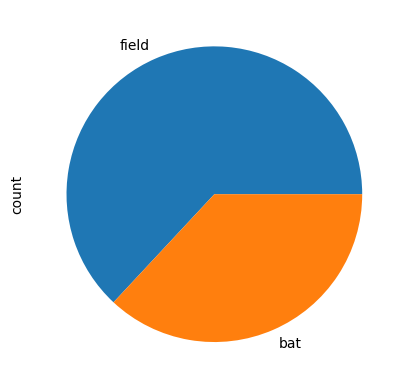

In [22]:
ipl['TossDecision'].value_counts().plot(kind='pie')

In [23]:
# how many matches each team has played

ipl['Team1'].value_counts()

Team1
Royal Challengers Bangalore    126
Mumbai Indians                 112
Chennai Super Kings            111
Kolkata Knight Riders          105
Kings XI Punjab                 92
Rajasthan Royals                89
Delhi Daredevils                85
Sunrisers Hyderabad             69
Deccan Chargers                 39
Delhi Capitals                  29
Pune Warriors                   23
Punjab Kings                    18
Gujarat Lions                   16
Lucknow Super Giants             8
Gujarat Titans                   7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [24]:
ipl['Team2'].value_counts()

Team2
Mumbai Indians                 119
Kolkata Knight Riders          118
Rajasthan Royals               103
Royal Challengers Bangalore    100
Kings XI Punjab                 98
Chennai Super Kings             97
Sunrisers Hyderabad             83
Delhi Daredevils                76
Deccan Chargers                 36
Delhi Capitals                  34
Pune Warriors                   23
Gujarat Lions                   14
Punjab Kings                    10
Gujarat Titans                   9
Rising Pune Supergiant           9
Lucknow Super Giants             7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [26]:
(ipl['Team1'].value_counts() + ipl['Team2'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

In [ ]:
### 2) 